## Importing the libraries and dataset

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('kidney_disease.csv', na_values=['?'])

In [3]:
data.head()

,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cells,pus_cell_clumps,bacteria,...,packed_cell_volume,white_blood_cell_count,red_blood_cells_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


## Splitting into categorical and numerical 

In [4]:
numerical = [var for var in data.columns if data[var].dtype != 'O']
data[numerical].head()

,id,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cells_count
0,0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2
1,1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN
2,2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN
3,3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9
4,4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6


In [5]:
categorical = [var for var in data.columns if data[var].dtype == 'O']
data[categorical].head()

,red_blood_cells,pus_cells,pus_cell_clumps,bacteria,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,classification
0,NaN,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,NaN,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd


## Missing values treatement

In [6]:
data[numerical].isnull().sum()

id                          0
age                         9
blood_pressure             12
specific_gravity           47
albumin                    46
sugar                      49
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
sodium                     87
potassium                  88
hemoglobin                 52
packed_cell_volume         70
white_blood_cell_count    105
red_blood_cells_count     130
dtype: int64

In [7]:
data[categorical].isnull().sum()

red_blood_cells            152
pus_cells                   65
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
classification               0
dtype: int64

In [8]:
for col in numerical:
        col_median = data[col].median()
        data[col].fillna(col_median, inplace = True )
data[numerical].isnull().sum()

id                        0
age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
hemoglobin                0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cells_count     0
dtype: int64

In [9]:
for col in categorical:
    mode_val = data[col].mode()[0]
    data[col].fillna(mode_val, inplace=True)
    
data[categorical].isnull().sum()

red_blood_cells            0
pus_cells                  0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
classification             0
dtype: int64

## Checking outliers

In [10]:
desc = data.describe()
print(desc)

               id         age  blood_pressure  specific_gravity    albumin  \
count  400.000000  400.000000      400.000000        400.000000  400.00000   
mean   199.500000   51.562500       76.575000          1.017712    0.90000   
std    115.614301   16.982996       13.489785          0.005434    1.31313   
min      0.000000    2.000000       50.000000          1.005000    0.00000   
25%     99.750000   42.000000       70.000000          1.015000    0.00000   
50%    199.500000   55.000000       80.000000          1.020000    0.00000   
75%    299.250000   64.000000       80.000000          1.020000    2.00000   
max    399.000000   90.000000      180.000000          1.025000    5.00000   

            sugar  blood_glucose_random  blood_urea  serum_creatinine  \
count  400.000000            400.000000  400.000000        400.000000   
mean     0.395000            145.062500   56.693000          2.997125   
std      1.040038             75.260774   49.395258          5.628886   
min  

### blood_pressure, blood_glucose_random, blood_urea,serum_creatinine,potassium & white_blood_cell_count have extreme outliers 

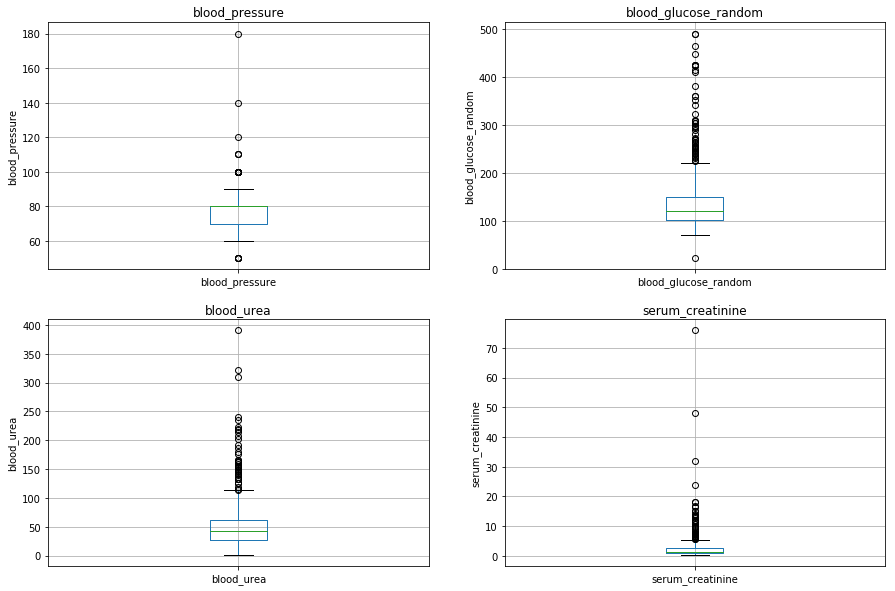

In [11]:
plt.figure(figsize = (15,10))
plt.title('Skewness')

fig = plt.subplot(2,2,1)
fig = data.boxplot(column = 'blood_pressure')
fig.set_title('blood_pressure')
fig.set_ylabel('blood_pressure')

fig = plt.subplot(2,2,2)
fig = data.boxplot(column = 'blood_glucose_random')
fig.set_title('blood_glucose_random')
fig.set_ylabel('blood_glucose_random')

fig = plt.subplot(2,2,3)
fig = data.boxplot(column = 'blood_urea')
fig.set_title('blood_urea')
fig.set_ylabel('blood_urea')

fig = plt.subplot(2,2,4)
fig = data.boxplot(column = 'serum_creatinine')
fig.set_title('serum_creatinine')
fig.set_ylabel('serum_creatinine')


plt.show()

Text(0,0.5,'white_blood_cell_count')

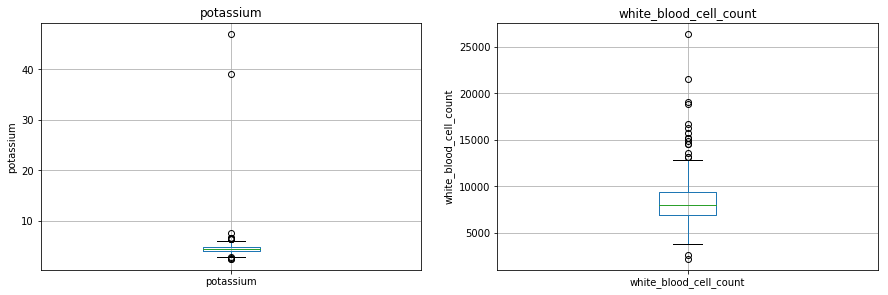

In [12]:
plt.figure(figsize = (15,10))

fig = plt.subplot(2,2,1)
fig = data.boxplot(column = 'potassium')
fig.set_title('potassium')
fig.set_ylabel('potassium')

fig = plt.subplot(2,2,2)
fig = data.boxplot(column = 'white_blood_cell_count')
fig.set_title('white_blood_cell_count')
fig.set_ylabel('white_blood_cell_count')


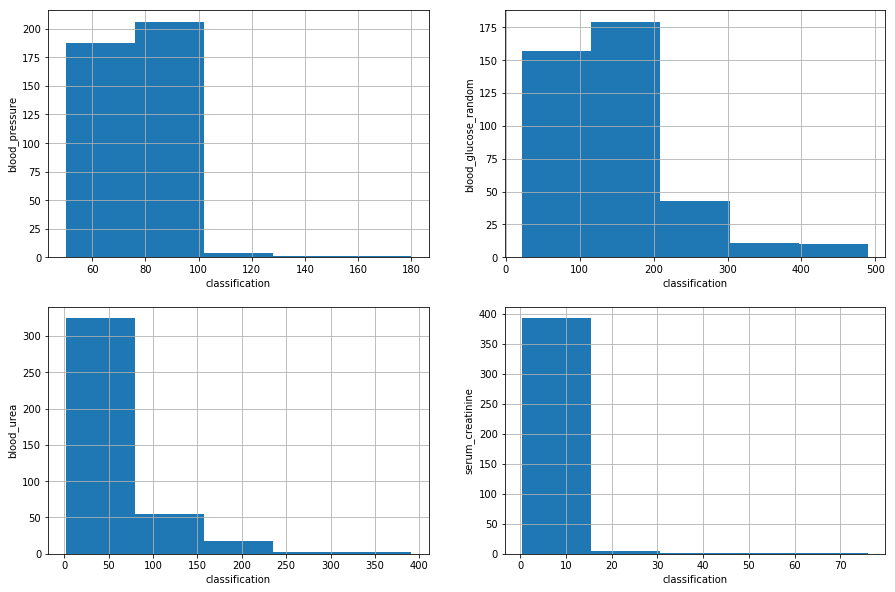

In [13]:
#checking skewness of these features

plt.figure(figsize = (15,10))

plt.subplot(2,2,1)
fig = data.blood_pressure.hist(bins = 5)
fig.set_xlabel('classification')
fig.set_ylabel('blood_pressure')

plt.subplot(2,2,2)
fig = data.blood_glucose_random.hist(bins = 5)
fig.set_xlabel('classification')
fig.set_ylabel('blood_glucose_random')

plt.subplot(2,2,3)
fig = data.blood_urea.hist(bins = 5)
fig.set_xlabel('classification')
fig.set_ylabel('blood_urea')

plt.subplot(2,2,4)
fig = data.serum_creatinine.hist(bins = 5)
fig.set_xlabel('classification')
fig.set_ylabel('serum_creatinine')


plt.show()

Text(0,0.5,'white_blood_cell_count')

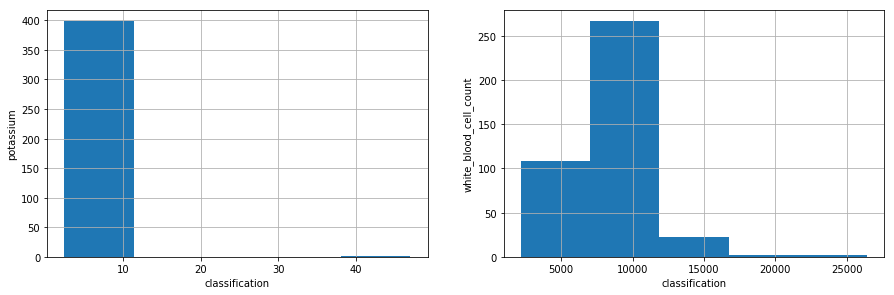

In [14]:
plt.figure(figsize = (15,10))

plt.subplot(2,2,3)
fig = data.potassium.hist(bins = 5)
fig.set_xlabel('classification')
fig.set_ylabel('potassium')


plt.subplot(2,2,4)
fig = data.white_blood_cell_count.hist(bins = 5)
fig.set_xlabel('classification')
fig.set_ylabel('white_blood_cell_count')


## Finding IQR value and cupping/capping outliers

In [15]:
### blood_pressure, blood_glucose_random, blood_urea,serum_creatinine,potassium & white_blood_cell_count have extreme outliers 
IQR = data.blood_pressure.quantile(0.75) - data.blood_pressure.quantile(0.25)
lower_fence = data.blood_pressure.quantile(0.25) - (IQR * 3)
upper_fence = data.blood_pressure.quantile(0.75) + (IQR * 3)
print(f'outlier valuer are <{lower_fence} and > {upper_fence}')

outlier valuer are <40.0 and > 110.0


In [16]:
#capping 
data['blood_pressure']=np.where(data['blood_pressure']>110,110,data['blood_pressure'])
#cupping
data['blood_pressure']=np.where(data['blood_pressure']<40,40,data['blood_pressure'])

In [17]:
IQR = data.blood_glucose_random.quantile(0.75) - data.blood_glucose_random.quantile(0.25)
lower_fence = data.blood_glucose_random.quantile(0.25) - (IQR * 3)
upper_fence = data.blood_glucose_random.quantile(0.75) + (IQR * 3)
print(f'outlier valuer are <{lower_fence} and > {upper_fence}')

outlier valuer are <-46.0 and > 297.0


In [18]:
#capping 
data['blood_glucose_random']=np.where(data['blood_glucose_random']>297,297,data['blood_glucose_random'])
#cupping
data['blood_glucose_random']=np.where(data['blood_glucose_random']<-46,-46,data['blood_glucose_random'])

In [19]:
IQR = data.blood_urea.quantile(0.75) - data.blood_urea.quantile(0.25)
lower_fence = data.blood_urea.quantile(0.25) - (IQR * 3)
upper_fence = data.blood_urea.quantile(0.75) + (IQR * 3)
print(f'outlier valuer are <{lower_fence} and > {upper_fence}')

outlier valuer are <-77.25 and > 166.0


In [20]:
#capping 
data['blood_urea']=np.where(data['blood_urea']>166,166,data['blood_urea'])
#cupping
data['blood_urea']=np.where(data['blood_urea']<-77.25,-77.25,data['blood_urea'])

In [21]:
IQR = data.serum_creatinine.quantile(0.75) - data.serum_creatinine.quantile(0.25)
lower_fence = data.serum_creatinine.quantile(0.25) - (IQR * 3)
upper_fence = data.serum_creatinine.quantile(0.75) + (IQR * 3)
print(f'outlier valuer are <{lower_fence} and > {upper_fence}')

outlier valuer are <-4.575 and > 8.200000000000001


In [22]:
#capping 
data['serum_creatinine']=np.where(data['serum_creatinine']>8.2,8.2,data['serum_creatinine'])
#cupping
data['serum_creatinine']=np.where(data['serum_creatinine']<-4.575,-4.575,data['serum_creatinine'])

In [23]:
IQR = data.potassium.quantile(0.75) - data.potassium.quantile(0.25)
lower_fence = data.potassium.quantile(0.25) - (IQR * 3)
upper_fence = data.potassium.quantile(0.75) + (IQR * 3)
print(f'outlier valuer are <{lower_fence} and > {upper_fence}')

outlier valuer are <1.6000000000000005 and > 7.199999999999999


In [24]:
#capping 
data['potassium']=np.where(data['potassium']>7.2,7.2,data['potassium'])
#cupping
data['potassium']=np.where(data['potassium']<1.6,1.6,data['potassium'])

In [25]:
IQR = data.white_blood_cell_count.quantile(0.75) - data.white_blood_cell_count.quantile(0.25)
lower_fence = data.white_blood_cell_count.quantile(0.25) - (IQR * 3)
upper_fence = data.white_blood_cell_count.quantile(0.75) + (IQR * 3)
print(f'outlier valuer are <{lower_fence} and > {upper_fence}')

outlier valuer are <-600.0 and > 16900.0


In [26]:
#capping 
data['white_blood_cell_count']=np.where(data['white_blood_cell_count']>16900,16900,data['white_blood_cell_count'])
#cupping
data['white_blood_cell_count']=np.where(data['white_blood_cell_count']<-600,-600,data['white_blood_cell_count'])

In [27]:
data.describe()

,id,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cells_count
count,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000
mean,199.500000,51.562500,76.300000,1.017712,0.90000,0.395000,140.510000,54.130500,2.340625,137.631250,4.397250,12.54250,39.100000,8244.417500,4.742250
std,115.614301,16.982996,12.193511,0.005434,1.31313,1.040038,60.526014,39.596138,2.251155,9.206332,0.690042,2.71649,8.171716,2308.660997,0.846571
min,0.000000,2.000000,50.000000,1.005000,0.00000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.10000,9.000000,2200.000000,2.100000
25%,99.750000,42.000000,70.000000,1.015000,0.00000,0.000000,101.000000,27.000000,0.900000,135.000000,4.000000,10.87500,34.000000,6900.000000,4.500000
50%,199.500000,55.000000,80.000000,1.020000,0.00000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.65000,40.000000,8000.000000,4.800000
75%,299.250000,64.000000,80.000000,1.020000,2.00000,0.000000,150.000000,61.750000,2.725000,141.000000,4.800000,14.62500,44.000000,9400.000000,5.100000
max,399.000000,90.000000,110.000000,1.025000,5.00000,5.000000,297.000000,166.000000,8.200000,163.000000,7.200000,17.80000,54.000000,16900.000000,8.000000


## Splitting into independent and target featuresand then into training and testing set

In [28]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

## Encoding categorical variables

In [30]:
x_train = pd.get_dummies(x_train, columns = ['red_blood_cells','pus_cells','pus_cell_clumps','bacteria','hypertension','diabetes_mellitus','coronary_artery_disease','appetite','pedal_edema','anemia'])
x_test = pd.get_dummies(x_test, columns = ['red_blood_cells','pus_cells','pus_cell_clumps','bacteria','hypertension','diabetes_mellitus','coronary_artery_disease','appetite','pedal_edema','anemia'])

In [31]:
x_train

,id,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,...,diabetes_mellitus_yes,coronary_artery_disease_\tno,coronary_artery_disease_no,coronary_artery_disease_yes,appetite_good,appetite_poor,pedal_edema_no,pedal_edema_yes,anemia_no,anemia_yes
336,336,25.0,60.0,1.020,0.0,0.0,119.0,27.0,0.5,138.0,...,0,0,1,0,1,0,1,0,1,0
64,64,55.0,80.0,1.010,0.0,0.0,146.0,42.0,1.3,138.0,...,0,1,0,0,1,0,1,0,1,0
55,55,35.0,80.0,1.005,3.0,0.0,121.0,42.0,1.3,138.0,...,0,0,1,0,1,0,0,1,1,0
106,106,50.0,90.0,1.020,0.0,0.0,89.0,118.0,6.1,127.0,...,1,0,1,0,1,0,0,1,0,1
300,300,45.0,60.0,1.020,0.0,0.0,114.0,26.0,0.7,141.0,...,0,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,323,43.0,80.0,1.025,0.0,0.0,130.0,30.0,1.1,143.0,...,0,0,1,0,1,0,1,0,1,0
192,192,46.0,110.0,1.015,0.0,0.0,130.0,16.0,0.9,138.0,...,0,0,1,0,1,0,1,0,1,0
117,117,55.0,70.0,1.020,0.0,0.0,219.0,36.0,1.3,139.0,...,0,0,1,0,1,0,1,0,1,0
47,47,11.0,80.0,1.010,3.0,0.0,121.0,17.0,0.8,138.0,...,0,0,1,0,1,0,1,0,1,0


In [32]:
x_test

,id,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,...,diabetes_mellitus_no,diabetes_mellitus_yes,coronary_artery_disease_no,coronary_artery_disease_yes,appetite_good,appetite_poor,pedal_edema_no,pedal_edema_yes,anemia_no,anemia_yes
132,132,50.0,80.0,1.020,0.0,0.0,219.0,166.0,8.2,136.0,...,1,0,1,0,1,0,0,1,0,1
309,309,51.0,60.0,1.020,0.0,0.0,129.0,25.0,1.2,139.0,...,1,0,1,0,1,0,1,0,1,0
341,341,63.0,70.0,1.025,0.0,0.0,130.0,37.0,0.9,150.0,...,1,0,1,0,1,0,1,0,1,0
196,196,49.0,100.0,1.010,3.0,0.0,129.0,158.0,8.2,122.0,...,0,1,1,0,0,1,0,1,0,1
246,246,48.0,110.0,1.015,3.0,0.0,106.0,166.0,8.2,120.0,...,1,0,0,1,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,14,68.0,80.0,1.010,3.0,2.0,157.0,90.0,4.1,130.0,...,0,1,0,1,0,1,0,1,1,0
363,363,67.0,80.0,1.025,0.0,0.0,99.0,40.0,0.5,138.0,...,1,0,1,0,1,0,1,0,1,0
304,304,33.0,80.0,1.025,0.0,0.0,128.0,38.0,0.6,135.0,...,1,0,1,0,1,0,1,0,1,0
361,361,29.0,80.0,1.020,0.0,0.0,70.0,16.0,0.7,138.0,...,1,0,1,0,1,0,1,0,1,0


### x_test has 3 missing columns so we will identify and reindex them and fill them with 0 

In [33]:
x_train_columns = x_train.columns
x_test_columns = x_test.columns

train_columns = set(x_train.columns)
test_columns = set(x_test.columns)

missing_in_test = train_columns - test_columns
extra_in_test = test_columns - train_columns

print(missing_in_test)
print(extra_in_test)

{'diabetes_mellitus_ yes', 'diabetes_mellitus_\tyes', 'coronary_artery_disease_\tno'}
set()


In [34]:
x_test = x_test.reindex(columns=x_train.columns, fill_value=0)

In [35]:
x_test

,id,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,...,diabetes_mellitus_yes,coronary_artery_disease_\tno,coronary_artery_disease_no,coronary_artery_disease_yes,appetite_good,appetite_poor,pedal_edema_no,pedal_edema_yes,anemia_no,anemia_yes
132,132,50.0,80.0,1.020,0.0,0.0,219.0,166.0,8.2,136.0,...,0,0,1,0,1,0,0,1,0,1
309,309,51.0,60.0,1.020,0.0,0.0,129.0,25.0,1.2,139.0,...,0,0,1,0,1,0,1,0,1,0
341,341,63.0,70.0,1.025,0.0,0.0,130.0,37.0,0.9,150.0,...,0,0,1,0,1,0,1,0,1,0
196,196,49.0,100.0,1.010,3.0,0.0,129.0,158.0,8.2,122.0,...,1,0,1,0,0,1,0,1,0,1
246,246,48.0,110.0,1.015,3.0,0.0,106.0,166.0,8.2,120.0,...,0,0,0,1,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,14,68.0,80.0,1.010,3.0,2.0,157.0,90.0,4.1,130.0,...,1,0,0,1,0,1,0,1,1,0
363,363,67.0,80.0,1.025,0.0,0.0,99.0,40.0,0.5,138.0,...,0,0,1,0,1,0,1,0,1,0
304,304,33.0,80.0,1.025,0.0,0.0,128.0,38.0,0.6,135.0,...,0,0,1,0,1,0,1,0,1,0
361,361,29.0,80.0,1.020,0.0,0.0,70.0,16.0,0.7,138.0,...,0,0,1,0,1,0,1,0,1,0


## Model training

In [36]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [37]:
y_pred = classifier.predict(x_test)
y_pred

array(['ckd', 'notckd', 'notckd', 'ckd', 'ckd', 'ckd', 'ckd', 'notckd',
       'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'notckd', 'ckd', 'ckd',
       'notckd', 'ckd', 'ckd', 'ckd', 'ckd', 'notckd', 'ckd', 'notckd',
       'ckd', 'notckd', 'ckd', 'ckd', 'notckd', 'ckd', 'ckd', 'notckd',
       'notckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'notckd',
       'ckd', 'notckd', 'ckd', 'ckd', 'notckd', 'ckd', 'notckd', 'notckd',
       'ckd', 'ckd', 'ckd', 'ckd', 'notckd', 'ckd', 'notckd', 'notckd',
       'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'notckd', 'ckd', 'notckd',
       'ckd', 'notckd', 'ckd', 'ckd', 'ckd', 'notckd', 'ckd', 'notckd',
       'ckd', 'ckd', 'ckd', 'ckd', 'notckd', 'notckd', 'notckd', 'notckd'],
      dtype=object)

## Predict proba

In [38]:
# probability of getting output as 0 -
classifier.predict_proba(x_test)[:,0]

array([1. , 0. , 0. , 1. , 1. , 1. , 1. , 0. , 1. , 1. , 1. , 1. , 1. ,
       0. , 1. , 1. , 0. , 1. , 1. , 0.9, 1. , 0. , 1. , 0. , 1. , 0. ,
       1. , 1. , 0. , 0.9, 1. , 0. , 0.1, 1. , 0.9, 1. , 1. , 1. , 1. ,
       0. , 1. , 0. , 1. , 1. , 0. , 1. , 0. , 0. , 1. , 1. , 1. , 1. ,
       0. , 1. , 0. , 0. , 1. , 1. , 1. , 1. , 1. , 0. , 1. , 0. , 1. ,
       0. , 1. , 0.9, 1. , 0. , 0.9, 0. , 1. , 1. , 1. , 1. , 0. , 0. ,
       0. , 0. ])

In [39]:
# probability of getting output as 1
y_pred1 = classifier.predict_proba(x_test)[:,1]

In [40]:
y_pred_train = classifier.predict(x_train)
y_pred_train

array(['notckd', 'ckd', 'ckd', 'ckd', 'notckd', 'ckd', 'ckd', 'notckd',
       'notckd', 'notckd', 'notckd', 'notckd', 'ckd', 'ckd', 'ckd', 'ckd',
       'ckd', 'notckd', 'notckd', 'notckd', 'notckd', 'ckd', 'notckd',
       'ckd', 'notckd', 'notckd', 'ckd', 'notckd', 'ckd', 'notckd', 'ckd',
       'ckd', 'notckd', 'ckd', 'notckd', 'ckd', 'notckd', 'ckd', 'ckd',
       'notckd', 'ckd', 'ckd', 'ckd', 'ckd', 'notckd', 'ckd', 'ckd',
       'notckd', 'notckd', 'ckd', 'ckd', 'notckd', 'ckd', 'ckd', 'ckd',
       'ckd', 'notckd', 'ckd', 'notckd', 'ckd', 'ckd', 'ckd', 'ckd',
       'ckd', 'notckd', 'ckd', 'notckd', 'ckd', 'ckd', 'ckd', 'notckd',
       'ckd', 'notckd', 'ckd', 'ckd', 'ckd', 'notckd', 'ckd', 'ckd',
       'notckd', 'notckd', 'ckd', 'ckd', 'notckd', 'ckd', 'ckd', 'ckd',
       'ckd', 'ckd', 'ckd', 'ckd', 'notckd', 'ckd', 'notckd', 'ckd',
       'notckd', 'ckd', 'ckd', 'notckd', 'notckd', 'ckd', 'ckd', 'ckd',
       'notckd', 'ckd', 'ckd', 'ckd', 'ckd', 'notckd', 'notckd', 'ckd',

## Checking for overfitting and underfitting 

In [41]:
from sklearn.metrics import accuracy_score
print(f'Training-set accuracy score: {accuracy_score(y_train, y_pred_train)}')

Training-set accuracy score: 1.0


In [42]:
print(f'Testing-set accuracy score: {accuracy_score(y_test,y_pred )}')

Testing-set accuracy score: 1.0


In [43]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_pred,y_test)
print('Confusion Matrix\n\n',cm)

Confusion Matrix

 [[52  0]
 [ 0 28]]


## The confusion matrix shows 52 + 28 = 80 correct predictions and 0 incorrect predictions

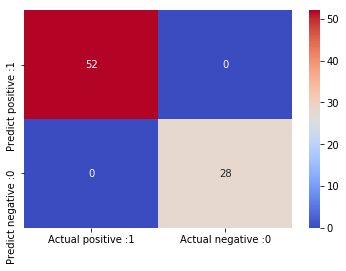

In [44]:
#visualizing confusion matrix using seaborn heatmp

c_matrix = pd.DataFrame(data = cm, columns =[ 'Actual positive :1', "Actual negative :0"],
                        index = ['Predict positive :1', 'Predict negative :0'] )
                                        
sns.heatmap(c_matrix ,annot = True, fmt = 'd',cmap = 'coolwarm')

In [45]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

## Classification accuracy & error

In [46]:
classification_accuracy = (TP + TN) / float (TP + TN + FP + FN)
print(f'Classification accuracy is {classification_accuracy:0.4f}')

Classification accuracy is 1.0000


In [47]:
classification_error = (FP + FN) / float (TP + TN + FP + FN)
print(f'Classification error is {classification_error:0.4f}')

Classification error is 0.0000


## Precision

In [48]:
precision = TP / float (TP+FP)
print(f'precision = {precision:0.4f}')

precision = 1.0000


In [49]:
precision = TP / float (TP+FP)
print(f'precision = {precision:0.4f}')

precision = 1.0000


## Recall

In [50]:
recall = TP / float (TP + FN)
print(f'Recall or sensitivity is {recall:.4f}')

Recall or sensitivity is 1.0000


## Specificity

In [51]:
specificity = TN / float (TN + FP)
print(f'Specificity is {specificity:.4f}')

Specificity is 1.0000


## Classification Report & f1 score

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ckd       1.00      1.00      1.00        52
      notckd       1.00      1.00      1.00        28

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



## ROC_AUC score

In [53]:
from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test,y_pred1)
print(f'ROC-AUC score is {ROC_AUC:.4}')

ROC-AUC score is 1.0


## K fold cross validation

In [54]:
from sklearn.model_selection import cross_val_score
cross_validated_accuracy = cross_val_score(classifier, x_train, y_train, cv = 5, scoring = 'accuracy')
print(f'cross validated accuracy is {cross_validated_accuracy}')

cross validated accuracy is [1.       1.       1.       1.       0.984375]
